In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("ols-regression-data/cancer_processed.csv")
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,lowerBound,upperBound,median
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,61494.5,125635.0,93564.75
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,48021.6,51046.4,49534.00
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,48021.6,51046.4,49534.00
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,42724.4,45201.0,43962.70
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,48021.6,51046.4,49534.00


In [54]:
df.shape

(3047, 36)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

In [56]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,lowerBound,upperBound,median
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,43752.766328,54003.470233,48878.118280
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,10458.892963,24993.679829,16889.719362
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,22640.000000,34218.100000,28429.050000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,37413.800000,40362.700000,38888.250000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,45201.000000,48021.600000,46611.300000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,51046.400000,54545.600000,52796.000000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,61494.500000,125635.000000,93564.750000


In [57]:
df.nunique()

avgAnnCount                 929
avgDeathsPerYear            608
TARGET_deathRate           1053
incidenceRate              1506
medIncome                  2920
popEst2015                 2999
povertyPercent              333
studyPerCap                1117
MedianAge                   325
MedianAgeMale               298
MedianAgeFemale             296
Geography                  3047
AvgHouseholdSize            199
PercentMarried              362
PctNoHS18_24                405
PctHS18_24                  469
PctSomeCol18_24             343
PctBachDeg18_24             219
PctHS25_Over                361
PctBachDeg25_Over           281
PctEmployed16_Over          409
PctUnemployed16_Over        195
PctPrivateCoverage          498
PctPrivateCoverageAlone     459
PctEmpPrivCoverage          450
PctPublicCoverage           395
PctPublicCoverageAlone      319
PctWhite                   3044
PctBlack                   2972
PctAsian                   2852
PctOtherRace               2903
PctMarri

### Missing values

In [58]:
null_values = df.isnull().sum()
null_values[null_values > 0]

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64

### Analyzing variables

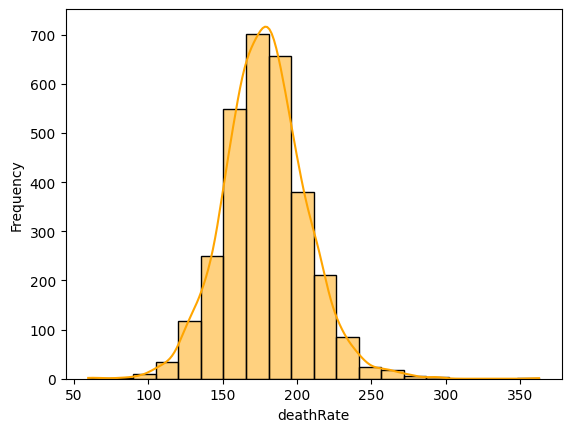

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['TARGET_deathRate'],bins = 20,color = 'orange',edgecolor = 'black',kde=True)
plt.xlabel('deathRate')
plt.ylabel('Frequency')
plt.show()

## Observation
 - slightly skewed dataset
 -  there are outliers as well 
 - normal distributed data
 - mean > median (slightly positively skewed data)
 - there are 3 peaks in the data(bimodal data)

In [60]:
cat_col = df.select_dtypes(include = ['object']).columns
cat_col.to_numpy()

array(['Geography'], dtype=object)

# Box Plot for outliers 

In [1]:
import plotly.graph_objects as go 
fig = go.figure